In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd


from tts_king import TTSKing

In [2]:
tts_king = TTSKing(config_path='config.yaml')

Removing weight norm for inference HIFI GAN...


In [3]:
tts_king.text_preprocess('работать и работать, сказал он')

Raw Text Sequence: работать и работать, сказал он
Phoneme Sequence: {R A B O0 T A T0 I R A B O0 T A T0 sp S K A Z A0 L O0 N sp}


array([[121,  88,  90, 118, 127,  88, 128, 104, 121,  88,  90, 118, 127,
         88, 128,  85, 123, 107,  88, 139,  89, 111, 118, 115,  85]])

In [4]:
tts_king.speakers[:10]

['Samoedov_E_abooks_voxforge',
 'Ktorov_Anatoliy_abooks_voxforge',
 'Cherhjak_M_abooks_voxforge',
 'Muravjeva_I_abooks_voxforge',
 'Lazarev_Yurii_abooks_voxforge',
 'Papanov_Anatoliy_abooks_voxforge',
 'Zemcov_D_abooks_voxforge',
 'user25_mozilla',
 'Evstigneev_E_abooks_voxforge',
 'Rajkin_Arkadij_abooks_voxforge']

In [55]:
[n for n in tts_king.speakers if 'Ut' in n]

['Utochkina_O_abooks_voxforge']

In [56]:
text_one = """Весной ферма наташи поросла густой растительностью, что вызвало настоящую эпидемию страха.
                                    Почки на деревьях набухли раньше,  и испуганные садоводы говорили что ветки этих деревьев раскачиваются, даже когда нет ветра. 
                                    """
text_two = """
Это был обычный солнечный день, ничто не предвещало беды. И тут жена спросила:
- Я не толстая?"""

text_three ="""
Кто рано встаёт, тот за день сто раз зевнёт."""

mel_postnet = tts_king.generate_mel(text_one, 
                                    1.1,1,1,speaker='Utochkina_O_abooks_voxforge')

Raw Text Sequence: Весной ферма наташи поросла густой растительностью, что вызвало настоящую эпидемию страха.
                                    Почки на деревьях набухли раньше,  и испуганные садоводы говорили что ветки этих деревьев раскачиваются, даже когда нет ветра. 
                                    
Phoneme Sequence: {V0 I S N O0 J0 F0 E0 R M A N A T A SH Y P A R A S L A0 G U S T O0 J0 R A S0 T0 I0 T0 I L0 N A S0 T0 J0 U sp SH T O0 V Y0 Z V A L A N A S T A J0 A0 SH0 U J0 U Y P0 I D0 E0 M0 I J0 U S T R A0 KH A sp P O0 TSH0 K0 I N A D0 I R0 E0 V0 J0 I KH N A B U0 KH L0 I R A0 N0 SH Y sp I S P U0 G A N Y J0 I S A D A V O0 D Y G A V A R0 I0 L0 I SH T O0 V0 E0 T K0 I E0 T0 I GH D0 I R0 E0 V0 J0 I F R A S K A0 TSH0 I V A J0 U TS A sp D A0 ZH Y K A G D A0 N0 E0 T V0 E0 T R A sp}


In [13]:
mel_postnet_np = np.array(mel_postnet.detach().cpu())[0]

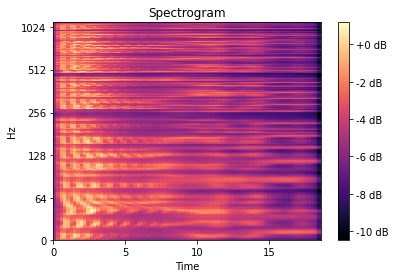

In [23]:
%matplotlib inline
librosa.display.specshow(mel_postnet_np, sr=2200, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram')
plt.show()

In [57]:
wav = tts_king.mel_to_wav(mel_postnet)

In [58]:
ipd.Audio(wav[0][0], rate=22050) 

In [36]:
from scipy.io.wavfile import write

write("./examples/minaev_rev_grad.wav", 22050, wav[0][0].astype(np.int16))